### loading dataset

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv('fraudTrain (1).csv')

In [49]:
data1= pd.read_csv('fraudTest.csv')

In [51]:
data.shape

(1296675, 23)

In [67]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [69]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [71]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### EDA

In [73]:
data['date_time_transaction']=pd.to_datetime(data['trans_date_trans_time'])

In [75]:
data['year']=data.date_time_transaction.dt.year
data['month']=data.date_time_transaction.dt.month
data['day']=data.date_time_transaction.dt.day
data['weeks']=data.date_time_transaction.dt.isocalendar().week

In [77]:
data.groupby('year')['is_fraud'].sum()

year
2019    5220
2020    2286
Name: is_fraud, dtype: int64

In [79]:
data.groupby('month')['is_fraud'].sum()

month
1     849
2     853
3     938
4     678
5     935
6     688
7     331
8     382
9     418
10    454
11    388
12    592
Name: is_fraud, dtype: int64

/var/folders/w9/n9hh0qzd62z_yp7lqx4tmzt80000gn/T/ipykernel_85711/518955240.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fraud.index, y=top_fraud.values, palette="coolwarm")


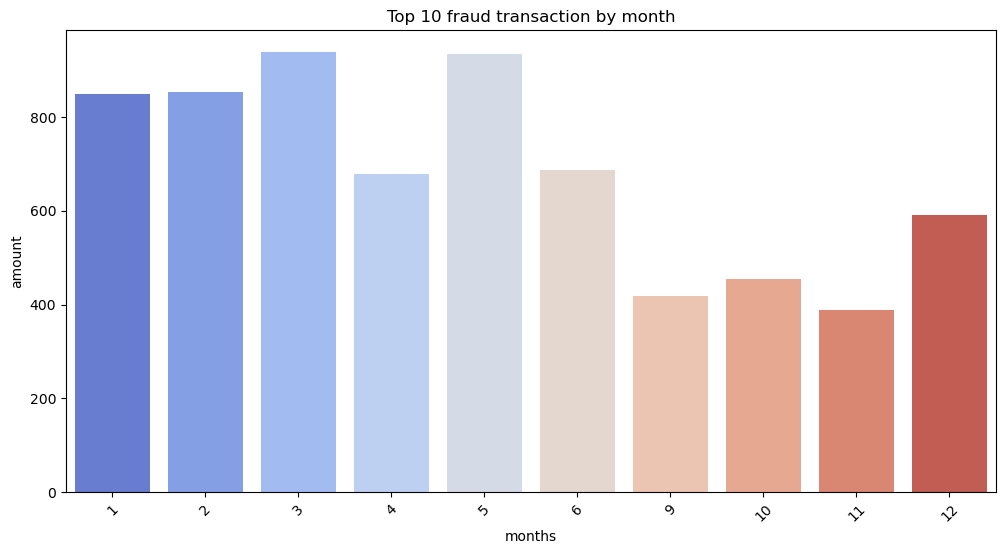

In [81]:

# Getting top 10 fraud transaction by month
top_fraud = data.groupby('month')['is_fraud'].sum().nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_fraud.index, y=top_fraud.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 fraud transaction by month")
plt.xlabel("months")
plt.ylabel("amount")
plt.show()

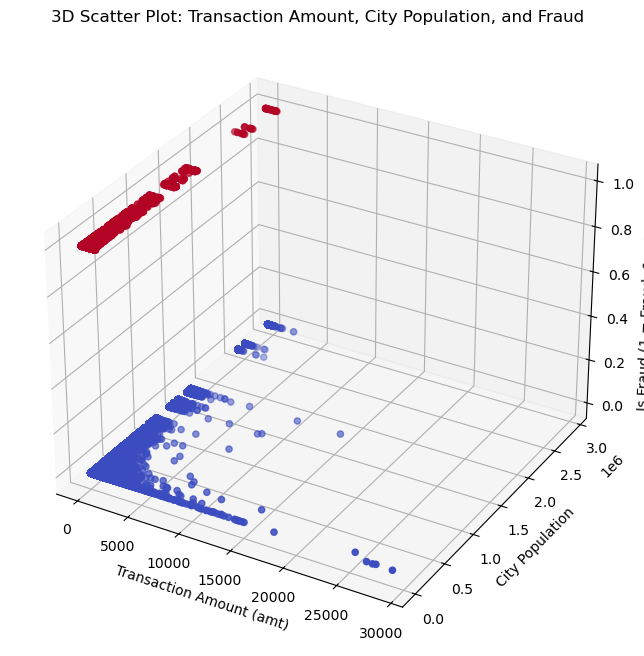

In [83]:

# 7. 3D Scatter Plot: Transaction Amount, City Population, and Fraud
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    data['amt'],
    data['city_pop'],
    data['is_fraud'],
    c=data['is_fraud'],
    cmap='coolwarm',
    s=20
)

# Labels
ax.set_xlabel('Transaction Amount (amt)')
ax.set_ylabel('City Population')
ax.set_zlabel('Is Fraud (1 = Fraud, 0 = Non-Fraud)')
plt.title('3D Scatter Plot: Transaction Amount, City Population, and Fraud')
plt.show()

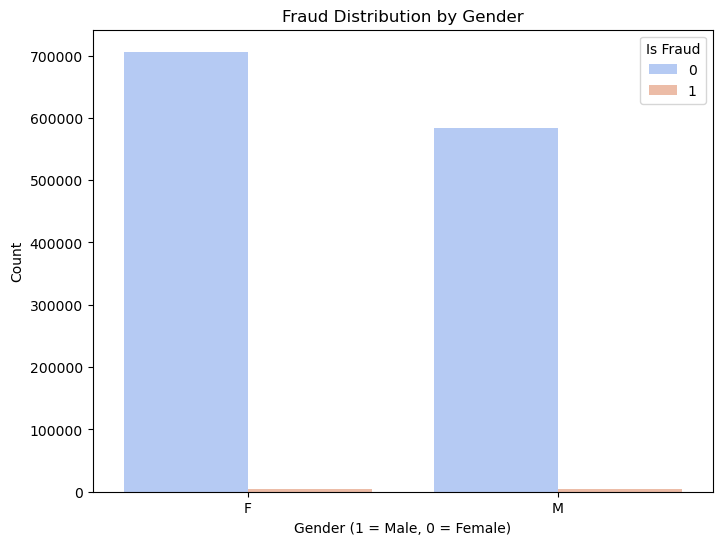

In [84]:
# Fraud Distribution by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='is_fraud', data=data, palette='coolwarm')
plt.title('Fraud Distribution by Gender')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

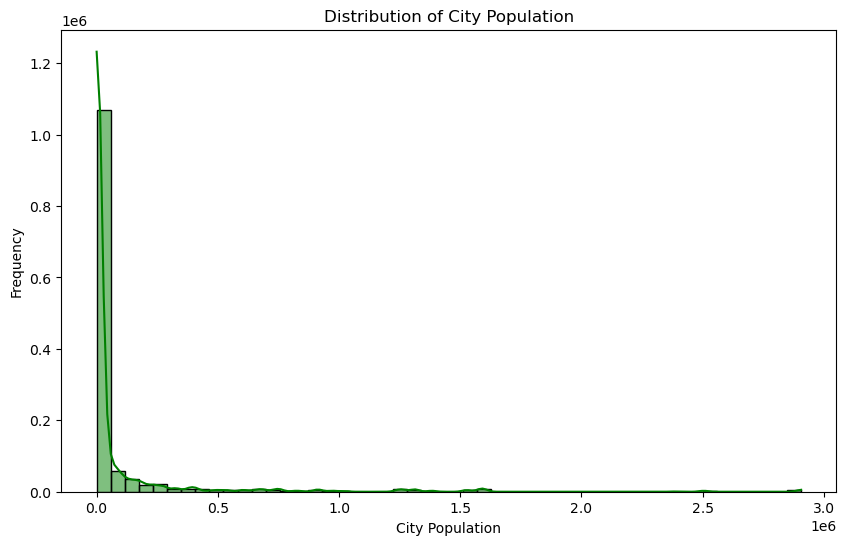

In [85]:
# Distribution of City Population
plt.figure(figsize=(10, 6))
sns.histplot(data['city_pop'], bins=50, kde=True, color='green')
plt.title('Distribution of City Population')
plt.xlabel('City Population')
plt.ylabel('Frequency')
plt.show()

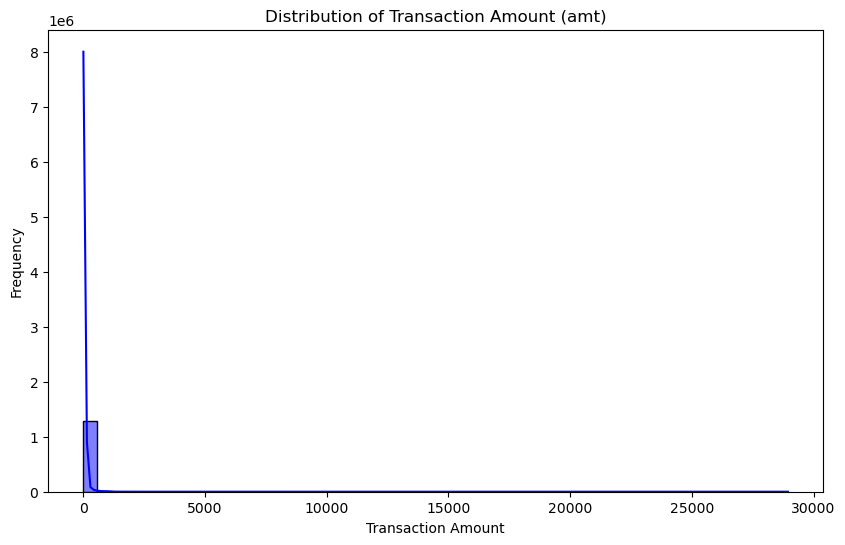

In [86]:
# Distribution of Transaction Amount (amt)
plt.figure(figsize=(10, 6))
sns.histplot(data['amt'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amount (amt)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

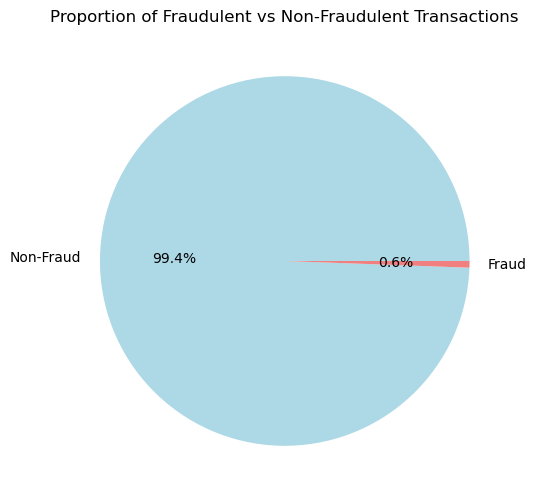

In [87]:
# Calculate fraud proportion
fraud_proportion = data['is_fraud'].value_counts(normalize=True)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_proportion, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

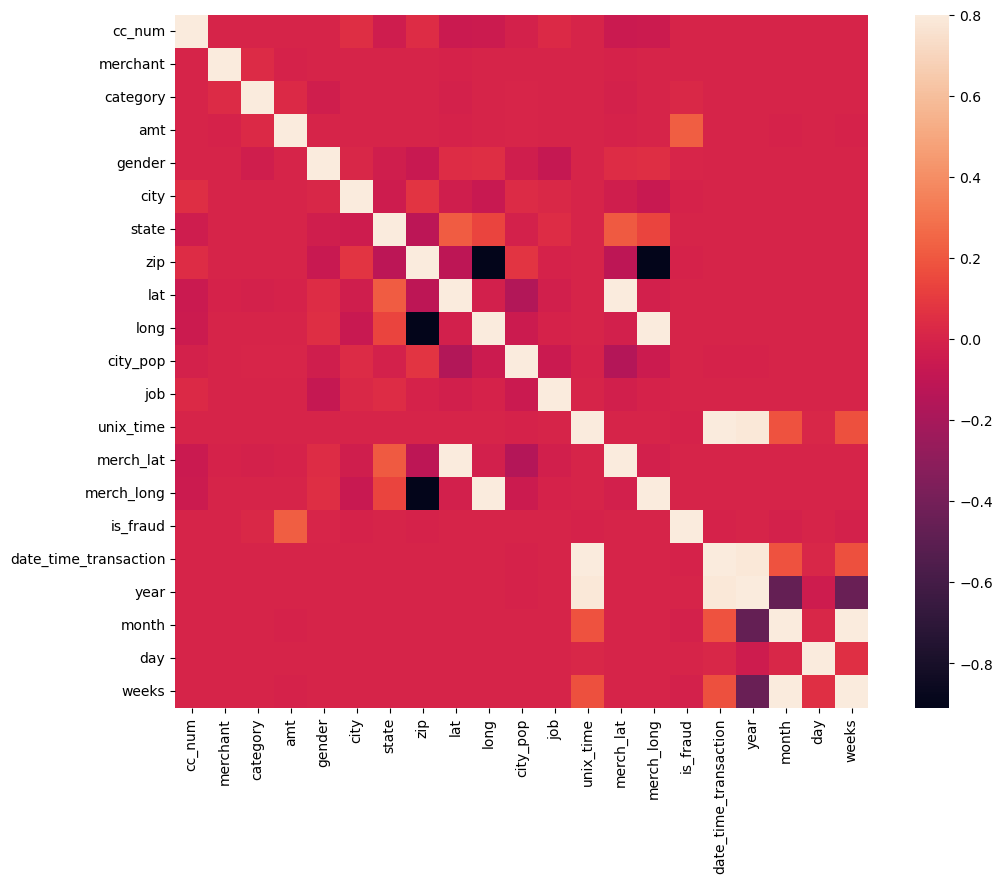

In [104]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [90]:
fraud = data[data['is_fraud'] == 1]
is_notfraud = data[data['is_fraud'] == 0]
print('Fraud Cases: {}'.format(len(data[data['is_fraud'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['is_fraud'] == 0])))


Fraud Cases: 7506
Valid Transactions: 1289169


### droping unwanted columns

In [9]:
data.drop(columns=['Unnamed: 0','dob','trans_num','first','last','trans_date_trans_time','street'],inplace=True)

In [11]:
data1.drop(columns=['Unnamed: 0','dob','trans_num','first','last','trans_date_trans_time','street'],inplace=True)

### Feature encoding


In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le= LabelEncoder()

In [17]:
data.merchant=le.fit_transform(data.merchant)
data.category=le.fit_transform(data.category)
data.gender=le.fit_transform(data.gender)
data.city=le.fit_transform(data.city)
data.state=le.fit_transform(data.state)
data.job=le.fit_transform(data.job)

In [18]:
data1.merchant=le.fit_transform(data1.merchant)
data1.gender=le.fit_transform(data1.gender)
data1.category=le.fit_transform(data1.category)
data1.state=le.fit_transform(data1.state)
data1.job=le.fit_transform(data1.job)
data1.city=le.fit_transform(data1.city)

### Train -Test split

In [21]:
X_train = data.loc[:,['cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long']]

In [23]:
X_test = data1.loc[:,['cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long']]

In [25]:
y_train= data['is_fraud']

In [27]:
y_test= data1['is_fraud']

### GradientBoostingClassifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [66]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [102]:
prediction = gb.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_test,prediction)

0.9979989886975252

In [108]:
a= gb.predict(X_train)

In [109]:
accuracy_score(y_train,a)

0.9976647964987372

### RANDOM FOREST 

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rfc= RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

In [118]:
rf_predict = rfc.predict(X_test)

In [120]:
accuracy_score(y_test,rf_predict)

0.9982365188161643

In [122]:
b=rfc.predict(X_train)

In [123]:
accuracy_score(y_train,b)

0.9999976863901903

### SVM

In [29]:
from sklearn.svm import SVC

In [31]:
svc =SVC()

In [33]:
svc.fit(X_train,y_train)

SVC()

In [35]:
svcpredict= svc.predict(X_test)

In [40]:
accuracy_score(y_test,svcpredict)

0.9961401355721147

In [42]:
c= svc.predict(X_train)

In [43]:
accuracy_score(y_train,c)

0.9942113482561166

### KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn = KNeighborsClassifier(n_neighbors=3)

In [127]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [129]:
x_pred = knn.predict(X_train)

In [130]:
y_pred = knn.predict(X_test)

In [133]:
accuracy_score(x_pred,y_train)

0.9995835502342529

In [135]:
accuracy_score(y_pred,y_test)

0.9892373663668149

In [137]:
scores = []

for i in range(1,16):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))

In [139]:
scores

[0.9907435232554582,
 0.9907435232554582,
 0.9892373663668149,
 0.9911843935514172,
 0.9903062519006908,
 0.9914255226112477,
 0.9902504683122225,
 0.9902504683122225,
 0.9890664166602186,
 0.9894515033677093,
 0.9894515033677093,
 0.9914687099055458,
 0.9902864577241376,
 0.990680541784607,
 0.989525281662135]